In [ ]:
pip install -U scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=7233eb0480749ded717c8c50c27f5ce318d5702246aaab01255417a76ebbafb6
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy.control import Antecedent, Consequent, Rule, ControlSystem, ControlSystemSimulation
import random

# Define a function to return random congestion values
def random_congestion():
    return random.randint(0, 10)

# Antecedents (Inputs) - congestion levels for each section
congestion_north = Antecedent(np.arange(0, 11, 1), 'congestion_north')
congestion_east = Antecedent(np.arange(0, 11, 1), 'congestion_east')
congestion_south = Antecedent(np.arange(0, 11, 1), 'congestion_south')
congestion_west = Antecedent(np.arange(0, 11, 1), 'congestion_west')

# Consequents (Outputs) - traffic light states
light_north = Consequent(np.arange(0, 2, 1), 'light_north')  # 0 for red, 1 for green
light_east = Consequent(np.arange(0, 2, 1), 'light_east')
light_south = Consequent(np.arange(0, 2, 1), 'light_south')
light_west = Consequent(np.arange(0, 2, 1), 'light_west')

# Membership functions for congestion levels
congestion_north.automf(3, names=['low', 'medium', 'high'])
congestion_east.automf(3, names=['low', 'medium', 'high'])
congestion_south.automf(3, names=['low', 'medium', 'high'])
congestion_west.automf(3, names=['low', 'medium', 'high'])

# congestion_north['low'] = fuzz.trimf(congestion_north.universe, [0, 0, 5])
# congestion_north['high'] = fuzz.trimf(congestion_north.universe, [5, 10, 10])

# congestion_west['low'] = fuzz.trimf(congestion_west.universe, [0, 0, 5])
# congestion_west['high'] = fuzz.trimf(congestion_west.universe, [5, 10, 10])

# congestion_east['low'] = fuzz.trimf(congestion_east.universe, [0, 0, 5])
# congestion_east['high'] = fuzz.trimf(congestion_east.universe, [5, 10, 10])

# congestion_south['low'] = fuzz.trimf(congestion_south.universe, [0, 0, 5])
# congestion_south['high'] = fuzz.trimf(congestion_south.universe, [5, 10, 10])

# Repeat for east, south, west

# Membership functions for light states
light_north['red'] = fuzz.trimf(light_north.universe, [0, 0, 0.5])
light_north['green'] = fuzz.trimf(light_north.universe, [0.5, 1, 1])
light_east['red'] = fuzz.trimf(light_east.universe, [0, 0, 0.5])
light_east['green'] = fuzz.trimf(light_east.universe, [0.5, 1, 1])
light_west['red'] = fuzz.trimf(light_west.universe, [0, 0, 0.5])
light_west['green'] = fuzz.trimf(light_west.universe, [0.5, 1, 1])
light_south['red'] = fuzz.trimf(light_south.universe, [0, 0, 0.5])
light_south['green'] = fuzz.trimf(light_south.universe, [0.5, 1, 1])

# light_north['red'] = fuzz.trimf(light_north.universe, [0, 0, 0])
# light_north['green'] = fuzz.trimf(light_north.universe, [1, 1, 1])
# light_east['red'] = fuzz.trimf(light_east.universe, [0, 0, 0])
# light_east['green'] = fuzz.trimf(light_east.universe, [1, 1, 1])
# light_west['red'] = fuzz.trimf(light_west.universe, [0, 0, 0])
# light_west['green'] = fuzz.trimf(light_west.universe, [1, 1, 1])
# light_south['red'] = fuzz.trimf(light_south.universe, [0, 0, 0])
# light_south['green'] = fuzz.trimf(light_south.universe, [1, 1, 1])

# Repeat for east, south, west

# Define rules based on congestion
rules = [
    Rule(antecedent=(congestion_north['low'] & congestion_east['low'] & congestion_south['low'] & congestion_west['low']),
         consequent=(light_north['red'], light_east['red'], light_south['red'], light_west['red'])),

    Rule(antecedent=(congestion_north['low'] & congestion_east['low'] & congestion_south['low'] & congestion_west['high']),
         consequent=(light_north['red'], light_east['red'], light_south['red'], light_west['green'])),

    Rule(antecedent=(congestion_north['low'] & congestion_east['low'] & congestion_south['high'] & congestion_west['low']),
         consequent=(light_north['red'], light_east['red'], light_south['green'], light_west['red'])),

    Rule(antecedent=(congestion_north['low'] & congestion_east['low'] & congestion_south['high'] & congestion_west['high']),
         consequent=(light_north['red'], light_east['red'], light_south['green'], light_west['green'])),

    Rule(antecedent=(congestion_north['low'] & congestion_east['high'] & congestion_south['low'] & congestion_west['low']),
         consequent=(light_north['red'], light_east['green'], light_south['red'], light_west['red'])),

    Rule(antecedent=(congestion_north['low'] & congestion_east['high'] & congestion_south['low'] & congestion_west['high']),
         consequent=(light_north['red'], light_east['green'], light_south['red'], light_west['green'])),

    Rule(antecedent=(congestion_north['low'] & congestion_east['high'] & congestion_south['high'] & congestion_west['low']),
         consequent=(light_north['red'], light_east['green'], light_south['green'], light_west['red'])),

    Rule(antecedent=(congestion_north['low'] & congestion_east['high'] & congestion_south['high'] & congestion_west['high']),
         consequent=(light_north['red'], light_east['green'], light_south['green'], light_west['green'])),

    Rule(antecedent=(congestion_north['high'] & congestion_east['low'] & congestion_south['low'] & congestion_west['low']),
         consequent=(light_north['green'], light_east['red'], light_south['red'], light_west['red'])),

    Rule(antecedent=(congestion_north['high'] & congestion_east['low'] & congestion_south['low'] & congestion_west['high']),
         consequent=(light_north['green'], light_east['red'], light_south['red'], light_west['green'])),

    Rule(antecedent=(congestion_north['high'] & congestion_east['low'] & congestion_south['high'] & congestion_west['low']),
         consequent=(light_north['green'], light_east['red'], light_south['green'], light_west['red'])),

    Rule(antecedent=(congestion_north['high'] & congestion_east['low'] & congestion_south['high'] & congestion_west['high']),
         consequent=(light_north['green'], light_east['red'], light_south['green'], light_west['green'])),
    #13
    Rule(antecedent=(congestion_north['high'] & congestion_east['high'] & congestion_south['low'] & congestion_west['low']),
         consequent=(light_north['green'], light_east['green'], light_south['red'], light_west['red'])),

    Rule(antecedent=(congestion_north['high'] & congestion_east['high'] & congestion_south['low'] & congestion_west['high']),
         consequent=(light_north['green'], light_east['green'], light_south['red'], light_west['green'])),

    Rule(antecedent=(congestion_north['high'] & congestion_east['high'] & congestion_south['high'] & congestion_west['low']),
         consequent=(light_north['green'], light_east['green'], light_south['green'], light_west['red'])),

    Rule(antecedent=(congestion_north['high'] & congestion_east['high'] & congestion_south['high'] & congestion_west['high']),
         consequent=(light_north['green'], light_east['green'], light_south['green'], light_west['green']))

    # Add more rules for different scenarios
]

# Control system
traffic_control = ControlSystem(rules)

# Create simulation object
traffic_simulation = ControlSystemSimulation(traffic_control)

# Input congestion values

traffic_simulation.input['congestion_north'] = 1
traffic_simulation.input['congestion_east'] = 1
traffic_simulation.input['congestion_south'] = 1
traffic_simulation.input['congestion_west'] = 1

# traffic_simulation.input['congestion_north'] = random_congestion()
# traffic_simulation.input['congestion_east'] = random_congestion()
# traffic_simulation.input['congestion_south'] = random_congestion()
# traffic_simulation.input['congestion_west'] = random_congestion()
# Repeat for east, south, west

# Compute the output
traffic_simulation.compute()

# Print the output for each traffic light state

picker = random.randint(1,4)

def probability_LowHigh(picker):
  if picker == 1:
    print("North Light State: Red")
    print("East Light State: Red")
    print("South Light State: Red")
    print("West Light State: Green")
  elif picker == 2:
    print("North Light State: Red")
    print("East Light State: Red")
    print("South Light State: Green")
    print("West Light State: Red")
  elif picker == 3:
    print("North Light State: Red")
    print("East Light State: Green")
    print("South Light State: Red")
    print("West Light State: Red")
  elif picker == 4:
    print("North Light State: Green")
    print("East Light State: Red")
    print("South Light State: Red")
    print("West Light State: Red")


if(traffic_simulation.output['light_north'] < 0.5 and
   traffic_simulation.output['light_east'] < 0.5 and
   traffic_simulation.output['light_south'] < 0.5 and
   traffic_simulation.output['light_west'] < 0.5 ):
    probability_LowHigh(picker)
elif(traffic_simulation.output['light_north'] > 0.5 and
   traffic_simulation.output['light_east'] > 0.5 and
   traffic_simulation.output['light_south'] > 0.5 and
   traffic_simulation.output['light_west'] > 0.5):
    probability_LowHigh(picker)
else:
  print("North Light State:", "Green" if traffic_simulation.output['light_north'] > 0.5 else "Red")
  print("East Light State:", "Green" if traffic_simulation.output['light_east'] > 0.5 else "Red")
  print("South Light State:", "Green" if traffic_simulation.output['light_south'] > 0.5 else "Red")
  print("West Light State:", "Green" if traffic_simulation.output['light_west'] > 0.5 else "Red")

print("")

# print("North Light State:", "Green" if traffic_simulation.output['light_north'] > 0.5 else "Red")
# print("East Light State:", "Green" if traffic_simulation.output['light_east'] > 0.5 else "Red")
# print("South Light State:", "Green" if traffic_simulation.output['light_south'] > 0.5 else "Red")
# print("West Light State:", "Green" if traffic_simulation.output['light_west'] > 0.5 else "Red")

# print("North Light State:", "Green" if traffic_simulation.output['light_north'] else "Red")
# print("East Light State:", "Green" if traffic_simulation.output['light_east'] else "Red")
# print("West Light State:", "Green" if traffic_simulation.output['light_west'] else "Red")
# print("South Light State:", "Green" if traffic_simulation.output['light_south'] else "Red")
# Repeat for east, south, west

North Light State: Green
East Light State: Red
South Light State: Red
West Light State: Red



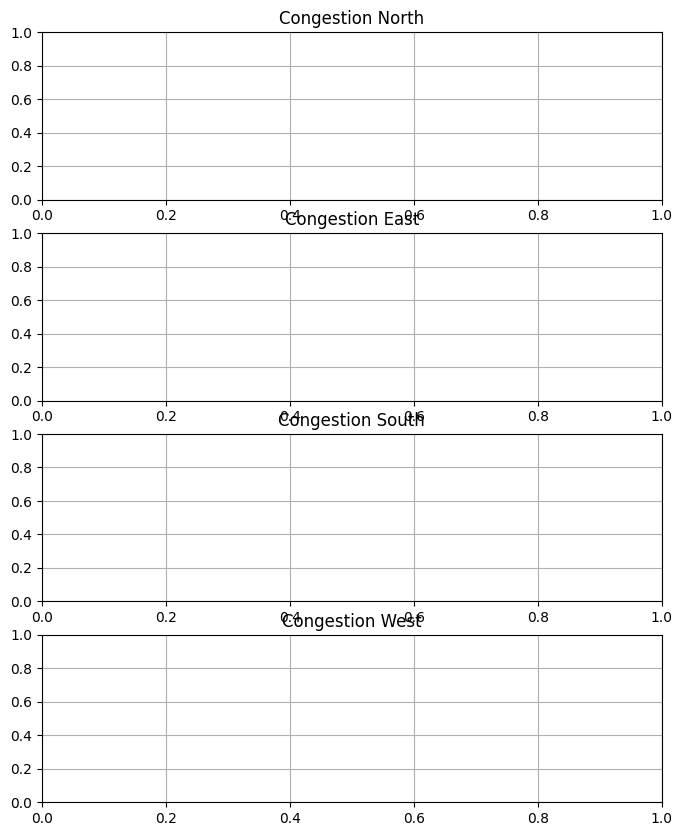

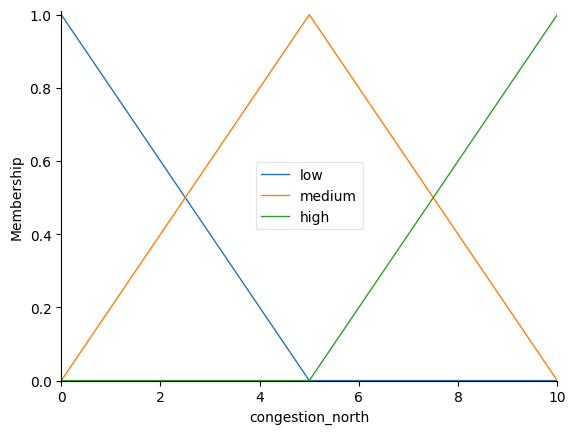

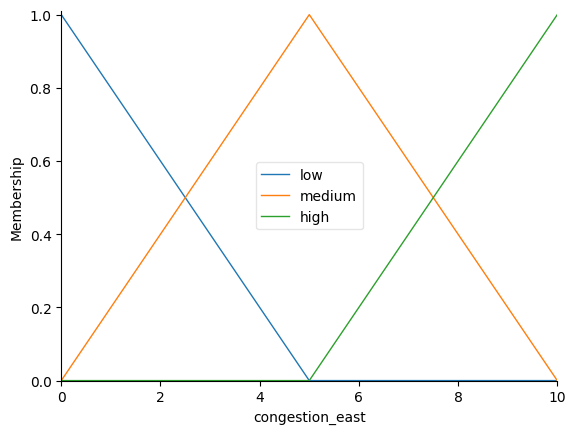

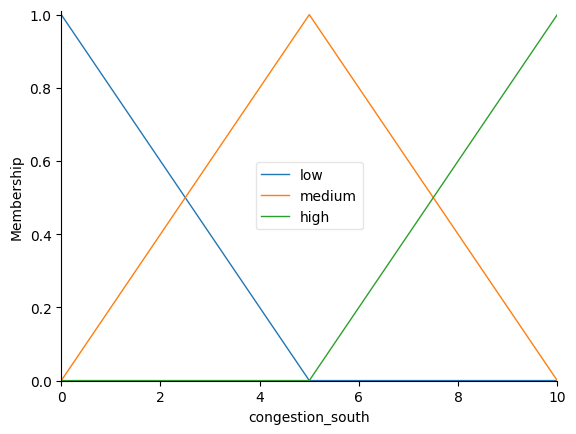

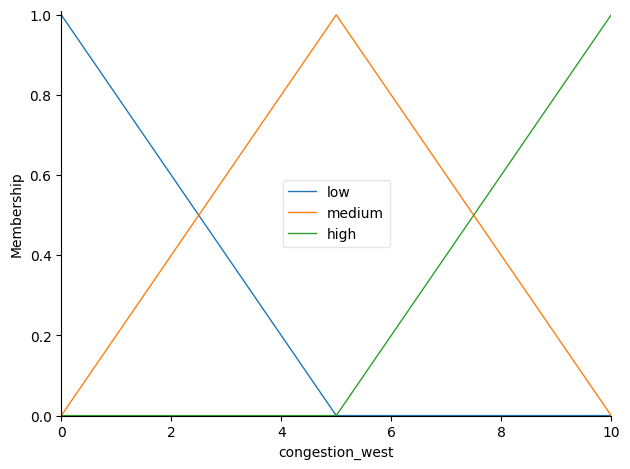

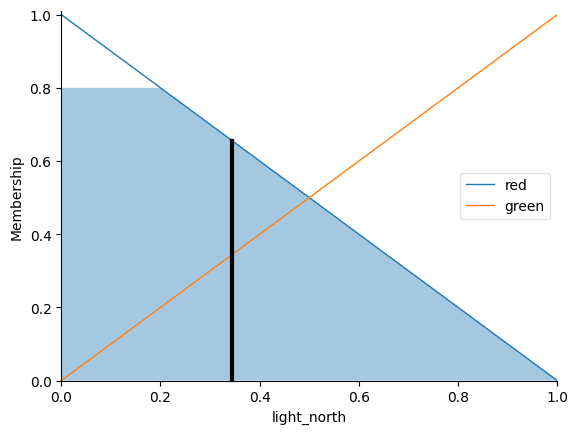

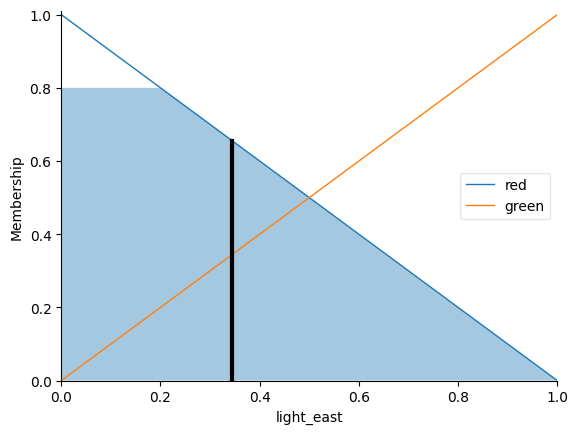

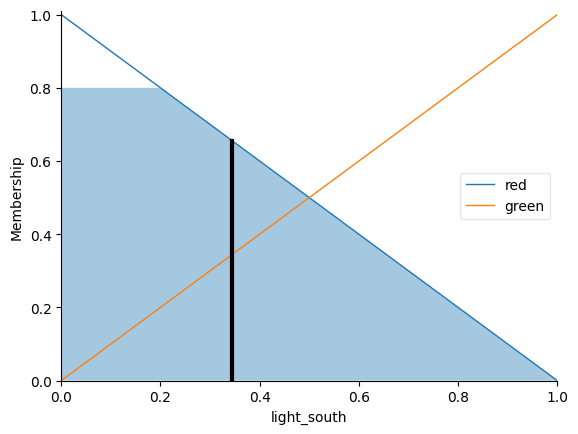

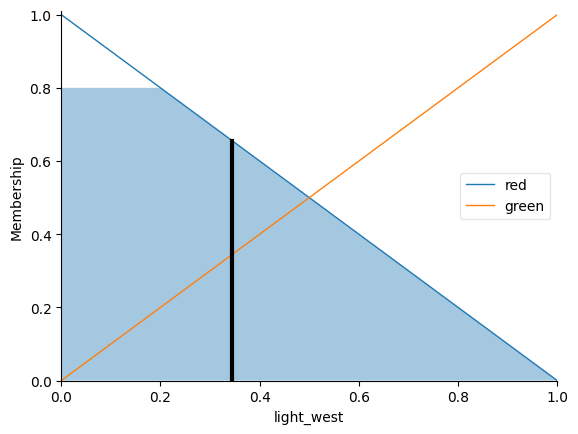

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy.control import Antecedent, Consequent, Rule, ControlSystem, ControlSystemSimulation
import matplotlib.pyplot as plt

# Your existing code...

# Create a new ControlSystemSimulation object for visualization
visualization_simulation = ControlSystemSimulation(traffic_control)

# Pass input values to the visualization simulation
visualization_simulation.input['congestion_north'] = 1
visualization_simulation.input['congestion_east'] = 1
visualization_simulation.input['congestion_south'] = 1
visualization_simulation.input['congestion_west'] = 1

# Compute the output for visualization
visualization_simulation.compute()

# Plot the membership functions
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(8, 10))

congestion_north.view(ax=ax0)
ax0.set_title('Congestion North')
ax0.grid(True)

congestion_east.view(ax=ax1)
ax1.set_title('Congestion East')
ax1.grid(True)

congestion_south.view(ax=ax2)
ax2.set_title('Congestion South')
ax2.grid(True)

congestion_west.view(ax=ax3)
ax3.set_title('Congestion West')
ax3.grid(True)

plt.tight_layout()
plt.show()

# Plot the output
light_north.view(sim=visualization_simulation)
light_east.view(sim=visualization_simulation)
light_south.view(sim=visualization_simulation)
light_west.view(sim=visualization_simulation)
plt.show()

# Your existing code...


In [ ]:
# import numpy as np
# import skfuzzy as fuzz
# from skfuzzy import control as ctrl
# import random

# # Define a function to return random boolean values
# def boolTaker():
#     return random.randint(0, 1)

# # Antecedent (input) - traffic density
# traffic_density1 = ctrl.Antecedent(np.arange(0, 2, 1), 'traffic_density1')
# traffic_density2 = ctrl.Antecedent(np.arange(0, 2, 1), 'traffic_density2')
# traffic_density3 = ctrl.Antecedent(np.arange(0, 2, 1), 'traffic_density3')
# traffic_density4 = ctrl.Antecedent(np.arange(0, 2, 1), 'traffic_density4')

# # Consequent (output) - traffic light state
# traffic_light1 = ctrl.Consequent(np.arange(0, 101, 1), 'traffic_light1')
# traffic_light2 = ctrl.Consequent(np.arange(0, 101, 1), 'traffic_light2')
# traffic_light3 = ctrl.Consequent(np.arange(0, 101, 1), 'traffic_light3')
# traffic_light4 = ctrl.Consequent(np.arange(0, 101, 1), 'traffic_light4')

# # Membership functions for traffic density
# traffic_density1['low'] = fuzz.trimf(traffic_density.universe, [0, 0, 1])
# traffic_density1['high'] = fuzz.trimf(traffic_density.universe, [0, 1, 1])

# traffic_density2['low'] = fuzz.trimf(traffic_density.universe, [0, 0, 1])
# traffic_density2['high'] = fuzz.trimf(traffic_density.universe, [0, 1, 1])

# traffic_density3['low'] = fuzz.trimf(traffic_density.universe, [0, 0, 1])
# traffic_density3['high'] = fuzz.trimf(traffic_density.universe, [0, 1, 1])

# traffic_density4['low'] = fuzz.trimf(traffic_density.universe, [0, 0, 1])
# traffic_density4['high'] = fuzz.trimf(traffic_density.universe, [0, 1, 1])

# # Membership functions for traffic light state
# traffic_light1['red'] = fuzz.trimf(traffic_light1.universe, [0, 0, 50])
# traffic_light1['green'] = fuzz.trimf(traffic_light1.universe, [50, 100, 100])

# traffic_light2['red'] = fuzz.trimf(traffic_light2.universe, [0, 0, 50])
# traffic_light2['green'] = fuzz.trimf(traffic_light2.universe, [50, 100, 100])

# traffic_light3['red'] = fuzz.trimf(traffic_light3.universe, [0, 0, 50])
# traffic_light3['green'] = fuzz.trimf(traffic_light3.universe, [50, 100, 100])

# traffic_light4['red'] = fuzz.trimf(traffic_light4.universe, [0, 0, 50])
# traffic_light4['green'] = fuzz.trimf(traffic_light4.universe, [50, 100, 100])

# # Rules definition
# rule1 = ctrl.Rule(traffic_density1['low'], traffic_light1['green'])
# rule2 = ctrl.Rule(traffic_density1['high'], traffic_light1['red'])

# rule3 = ctrl.Rule(traffic_density2['low'], traffic_light2['green'])
# rule4 = ctrl.Rule(traffic_density2['high'], traffic_light2['red'])

# rule5 = ctrl.Rule(traffic_density3['low'], traffic_light3['green'])
# rule6 = ctrl.Rule(traffic_density3['high'], traffic_light3['red'])

# rule7 = ctrl.Rule(traffic_density4['low'], traffic_light4['green'])
# rule8 = ctrl.Rule(traffic_density4['high'], traffic_light4['red'])

# # Control system and simulation
# traffic_control = ctrl.ControlSystem([rule1, rule2, rule3])
# traffic_simulation = ctrl.ControlSystemSimulation(traffic_control)

# # Input values
# traffic_simulation.input['traffic_density1'] = boolTaker()
# traffic_simulation.input['traffic_density2'] = boolTaker()
# # traffic_simulation.input['traffic_density3'] = boolTaker()
# # traffic_simulation.input['traffic_density4'] = boolTaker()

# # Compute the output
# traffic_simulation.compute()

# # Output values
# print("Traffic Light State:", traffic_simulation.output['traffic_light'])

ValueError: Crisp output cannot be calculated, likely because the system is too sparse. Check to make sure this set of input values will activate at least one connected Term in each Antecedent via the current set of Rules.